## Question 1 (Hill Climb Approach)

In [20]:
import random
import numpy
import math

#declaring number of hill climbs and steps
number_hill_climbs = 10
steps = 1000000
jbest = 0

for j in range(number_hill_climbs) :
    #initializing the first values 
    xb = 2*random.random()-1
    yb = 2*random.random()-1
    zb =2*random.random()-1
    fbest = math.exp(math.sin(40*zb)) + math.exp(math.sin(50*xb)) + math.sin(60*math.exp(yb))+ math.sin(70*math.sin(xb)) + math.sin(70*math.cos(zb)) + math.sin(math.sin(80*yb))- math.sin(10*(xb+yb)) + (xb**2+yb**2+zb**2)/4
    for i in range(1,steps):
        #adding steps
        xn = xb + random.gauss(0,0.1)
        yn = yb + random.gauss(0,0.1)
        zn = zb + random.gauss(0,0.1)
        #Repair to make sure the value remains in the constraints
        if xn > 1 :
            xn = 1
        if xn < -1 :
            xn = -1
        if yn > 1 :
            yn = 1
        if yn < -1 :
            yn = -1
        if zn > 1 :
            zn = 1
        if zn < -1 :
            zn = -1
        fnew = math.exp(math.sin(40*zn)) + math.exp(math.sin(50*xn)) + math.sin(60*math.exp(yn))+ math.sin(70*math.sin(xn)) + math.sin(70*math.cos(zn)) + math.sin(math.sin(80*yn))- math.sin(10*(xn+yn)) + (xn**2+yn**2+zn**2)/4
        if fnew > fbest:
            xb = xn
            yb = yn
            zb = zn
            fbest = fnew
print ('xbest' , xb, 'ybest' , yb,'zbest',zb, 'fbest', fbest,)

xbest -0.34458338724642723 ybest 0.7993394252854625 zbest 0.9798743977238868 fbest 10.58086639241758


## Question 2 (Hill Climb Approach) 

In [11]:
import numpy
import random

#given distance array 
dist = numpy.array([
    [0, 74, 58, 77, 88, 72, 61, 47, 101, 25, 75, 80, 43, 57, 33, 60, 93, 57, 22, 90, 52, 48, 95, 71, 35], 
    [74, 0, 25, 45, 55, 45, 62, 28, 30, 54, 20, 53, 47, 17, 57, 61, 19, 67, 52, 69, 26, 35, 37, 56, 43], 
    [58, 25, 0, 28, 40, 25, 68, 16, 45, 45, 18, 35, 22, 16, 33, 36, 40, 42, 38, 51, 7, 11, 38, 34, 37], 
    [77, 45, 28, 0, 13, 5, 96, 43, 47, 70, 25, 8, 34, 43, 45, 28, 49, 36, 62, 24, 34, 32, 27, 15, 64], 
    [88, 55, 40, 13, 0, 16, 109, 56, 51, 82, 35, 8, 45, 56, 55, 34, 56, 41, 74, 15, 47, 44, 29, 19, 76], 
    [72, 45, 25, 5, 16, 0, 93, 40, 50, 66, 25, 9, 29, 41, 40, 24, 51, 32, 57, 25, 31, 28, 31, 12, 60], 
    [61, 62, 68, 96, 109, 93, 0, 54, 90, 39, 78, 103, 74, 54, 74, 96, 77, 98, 49, 118, 62, 67, 98, 100, 36], 
    [47, 28, 16, 43, 56, 40, 54, 0, 55, 30, 31, 49, 24, 11, 31, 45, 46, 49, 25, 65, 9, 14, 52, 47, 21], 
    [101, 30, 45, 47, 51, 50, 90, 55, 0, 83, 28, 53, 66, 46, 78, 72, 13, 80, 80, 67, 49, 56, 23, 62, 72], 
    [25, 54, 45, 70, 82, 66, 39, 30, 83, 0, 60, 75, 40, 37, 37, 62, 73, 62, 11, 88, 38, 38, 82, 69, 11], 
    [75, 20, 18, 25, 35, 25, 78, 31, 28, 60, 0, 33, 38, 25, 50, 45, 26, 53, 55, 49, 23, 28, 22, 38, 51], 
    [80, 53, 35, 8, 8, 9, 103, 49, 53, 75, 33, 0, 37, 50, 47, 26, 56, 34, 66, 16, 41, 37, 32, 12, 69], 
    [43, 47, 22, 34, 45, 29, 74, 24, 66, 40, 38, 37, 0, 33, 12, 22, 62, 25, 30, 49, 21, 12, 55, 30, 38], 
    [57, 17, 16, 43, 56, 41, 54, 11, 46, 37, 25, 50, 33, 0, 41, 51, 36, 56, 35, 67, 12, 21, 47, 50, 27], 
    [33, 57, 33, 45, 55, 40, 74, 31, 78, 37, 50, 47, 12, 41, 0, 27, 73, 25, 26, 56, 31, 23, 67, 38, 38], 
    [60, 61, 36, 28, 34, 24, 96, 45, 72, 62, 45, 26, 22, 51, 27, 0, 72, 8, 51, 31, 39, 31, 55, 14, 60], 
    [93, 19, 40, 49, 56, 51, 77, 46, 13, 73, 26, 56, 62, 36, 73, 72, 0, 79, 71, 72, 43, 50, 30, 63, 62], 
    [57, 67, 42, 36, 41, 32, 98, 49, 80, 62, 53, 34, 25, 56, 25, 8, 79, 0, 51, 36, 44, 35, 63, 22, 62], 
    [22, 52, 38, 62, 74, 57, 49, 25, 80, 11, 55, 66, 30, 35, 26, 51, 71, 51, 0, 79, 32, 30, 76, 60, 15], 
    [90, 69, 51, 24, 15, 25, 118, 65, 67, 88, 49, 16, 49, 67, 56, 31, 72, 36, 79, 0, 56, 51, 44, 19, 84], 
    [52, 26, 7, 34, 47, 31, 62, 9, 49, 38, 23, 41, 21, 12, 31, 39, 43, 44, 32, 56, 0, 9, 44, 39, 30], 
    [48, 35, 11, 32, 44, 28, 67, 14, 56, 38, 28, 37, 12, 21, 23, 31, 50, 35, 30, 51, 9, 0, 48, 33, 32], 
    [95, 37, 38, 27, 29, 31, 98, 52, 23, 82, 22, 32, 55, 47, 67, 55, 30, 63, 76, 44, 44, 48, 0, 42, 73], 
    [71, 56, 34, 15, 19, 12, 100, 47, 62, 69, 38, 12, 30, 50, 38, 14, 63, 22, 60, 19, 39, 33, 42, 0, 65], 
    [35, 43, 37, 64, 76, 60, 36, 21, 72, 11, 51, 69, 38, 27, 38, 60, 62, 62, 15, 84, 30, 32, 73, 65, 0],
    ])

#Assigning stores to one of the warehouses based on their distance 
w1_list, w2_list = list(),list()
for i in range(23):
    if(dist[23][i] < dist[24][i]) :
        w1_list.append(i+1)
    else :
        w2_list.append(i+1)
print("w1_list :",w1_list)
print("w2_list :",w2_list)

#Dividing the problem in to 2 separate TSP problems
#Manually typing the distance matrix of each of the lists
#Distance matrix  of [3, 4, 5, 6, 9, 11, 12, 13, 16, 18, 20, 23] wrt store W1
dist_W1 = numpy.array([
    [0, 28, 40, 25, 45, 18, 35, 22, 36, 42, 51, 38, 34],#3
    [28, 0, 13, 5, 47, 25, 8, 34, 28, 36, 24, 27, 15],#4
    [40, 13, 0, 16, 51, 35, 8, 45, 34, 41, 15, 29, 19],#5
    [25, 5, 16, 0, 50, 25, 9, 29, 24, 32, 25, 31, 12],#6
    [45, 47, 51, 50, 0, 28, 53, 66, 72, 80, 67, 23, 62],#9
    [18, 25, 35, 25, 28, 0, 33, 38, 45, 53, 49, 22, 38],#11
    [35, 8, 8, 9, 53, 33, 0, 37, 26, 34, 16, 32, 12],#12
    [22, 34, 45, 29, 66, 38, 37, 0, 22, 25, 49, 55, 30],#13
    [36, 28, 34, 24, 72, 45, 26, 22, 0, 8, 31, 55, 14],#16
    [42, 36, 41, 32, 80, 53, 34, 25, 8, 0, 36, 63, 22],#18
    [51, 24, 15, 25, 67, 49, 16, 49, 31, 36, 0, 44, 19],#20
    [38, 27, 29, 31, 23, 22, 32, 55, 55, 63, 44, 0, 42],#23
    [34, 15, 19, 12, 62, 38, 12, 30, 14, 22, 19, 42, 0],#W1   286 
    ])


dist_W2 = numpy.array([
    [0, 74, 61, 47, 25, 57, 33, 93, 22, 52, 48, 35],#1
    [74, 0, 62, 28, 54, 17, 57, 19, 52, 26, 35, 43],#2
    [61, 62, 0, 54, 39, 54, 74, 77, 49, 62, 67, 36],#7
    [47, 28, 54, 0, 30, 11, 31, 46, 25, 9, 14, 21],#8
    [25, 54, 39, 30, 0, 37, 37, 73, 11, 38, 38, 11],#10
    [57, 17, 54, 11, 37, 0, 41, 36, 35, 12, 21, 27],#14
    [33, 57, 74, 31, 37, 41, 0, 73, 26, 31, 23, 38],#15
    [93, 19, 77, 46, 73, 36, 73, 0, 71, 43, 50, 62],#17
    [22, 52, 49, 25, 11, 35, 26, 71, 0, 32, 30, 15],#19
    [52, 26, 62, 9, 38, 12, 31, 43, 32, 0, 9, 30],#21
    [48, 35, 67, 14, 38, 21, 23, 50, 30, 9, 0, 32],#22
    [35, 43, 36, 21, 11, 27, 38, 62, 15, 30, 32, 0],#W2
])

w1_list : [3, 4, 5, 6, 9, 11, 12, 13, 16, 18, 20, 23]
w2_list : [1, 2, 7, 8, 10, 14, 15, 17, 19, 21, 22]


In [10]:
#Predefining the combinations possible for the vehicle
vehicle_combinations = [('Van','Van','Van'),('Lorry'),('Van','Lorry'),('Van','Van','Lorry')]

#method to insert valuess in list according to the combinations and return the updated list with corressponding cost
def add_vehicle(best_path):
    size = len(best_path)
    
    #print(size,"size in method")
    if best_path.count(size) > 0 :
        best_path.remove(size)
    cost_list = list()
    choice = random.choice(vehicle_combinations)
    if choice == ('Van','Van','Van') :
        best_path.insert(0,size)
        best_path.insert(5,size)
        best_path.insert(10,size)
        #print(len(best_path))
        cost_list = [1,1,1,1,1,1,1,1,1,1,1,1,1,1]
        
    elif choice == ('Lorry') :
        best_path.insert(0,size)
        #print(len(best_path))
        cost_list = [2,2,2,2,2,2,2,2,2,2,2,2]
        
    elif choice == ('Van','Lorry') :
        best_path.insert(0,size)
        best_path.insert(5,size)
        #print(len(best_path))
        cost_list = [1,1,1,1,1,2,2,2,2,2,2,2,2]
        
    else :
        best_path.insert(0,size)
        best_path.insert(5,size)
        best_path.insert(10,size)
        #print(len(best_path))
        cost_list = [1,1,1,1,1,1,1,1,1,1,2,2,2,2]
    
    return best_path,choice,cost_list
        
    

In [9]:
import random
import numpy 

#main tsp algorithm
def tsp(dist) :
    
    #initializing overall best variables
    best_path_overall = list()
    best_distance_overall = 99999
    best_cost_overall = 99999
    best_choice_overall = tuple()
    number_of_hillclimbs=100
    for i in range(number_of_hillclimbs) :
        size = len(dist[1,:])    #Gives the number of nodes
        best_path = []
        for i in range(size):
            best_path.append(i+1)   #Buids up a vector of 1,2,3,4...,n

        random.shuffle(best_path)  #Randomise path to get initial solution
        best_pathx2 = best_path.copy()
        best_path,choice,cost_list = add_vehicle(best_path)
       

        ##### Find distance of initial solution
        size = len(best_path)
        best_distance =  dist[best_path[size-1]-1][best_path[0]-1]  #Distance from final node to start  node
        best_cost = best_distance * cost_list[-1]
        best_choice = choice
        for i in range(size-1):
            best_distance = best_distance + dist[best_path[i]-1][best_path[i+1]-1]  #Add distances of each part of the path
            best_cost = best_cost + (dist[best_path[i]-1][best_path[i+1]-1] * cost_list[i])

        
        number_of_swaps = 10000 #Number of hill-climb steps

        for x in range(number_of_swaps) :
            ##### Create a new path
            entry1 = random.randint(1,len(best_pathx2)-1) # randomly choose first entry
            entry2 = random.randint(1,len(best_pathx2)-1) # randomly choose second entry
            new_path = best_pathx2.copy() 
         
            new_path[entry1],new_path[entry2] = new_path[entry2],new_path[entry1] #changes the vector given the two random entries to swap
            
            ##### Calculate distance of the new path
            new_path,choice,cost_list = add_vehicle(new_path)
            size = len(new_path)
            new_distance = dist[new_path[size-1]-1][new_path[0]-1]  #Distance from final node to start node
            new_cost = new_distance * cost_list[-1]

            for i in range(len(new_path)-1):
                new_distance = new_distance + dist[new_path[i]-1][new_path[i+1]-1]
                new_cost = new_cost + (dist[new_path[i]-1][new_path[i+1]-1] * cost_list[i])
            

            ##### Check if new path is shorter than best path  
            if new_cost < best_cost:
                best_path = new_path.copy()
                best_distance = new_distance
                best_cost = new_cost
                best_choice = choice
                
        if best_cost < best_cost_overall:
            best_path_overall = best_path.copy()
            best_distance_overall = best_distance
            best_cost_overall = best_cost
            best_choice_overall = best_choice
    return best_path_overall,best_distance_overall,best_choice_overall,best_cost_overall

In [13]:
#calling methods to return best path and choices for both warehouses
best_path_overall_W1,best_distance_overall_W1,best_choice_overall_W1,best_cost_overall_W1 = tsp(dist_W1)
best_path_overall_W2,best_distance_overall_W2,best_choice_overall_W2,best_cost_overall_W2 = tsp(dist_W2)

print(best_path_overall_W1,best_distance_overall_W1,best_choice_overall_W1,best_cost_overall_W1,"W1")
print(best_path_overall_W2,best_distance_overall_W2,best_choice_overall_W2,best_cost_overall_W2,"W2")


print("The Least combined cost for all deliveries : ",best_cost_overall_W1+best_cost_overall_W2)

[13, 7, 3, 2, 11, 13, 1, 8, 10, 9, 13, 12, 5, 6, 4] 309 ('Van', 'Van', 'Van') 309 W1
[12, 6, 2, 8, 3, 12, 5, 9, 1, 7, 12, 4, 10, 11] 362 ('Van', 'Van', 'Van') 362 W2
The Least combined cost for all deliveries :  671


## Question 3

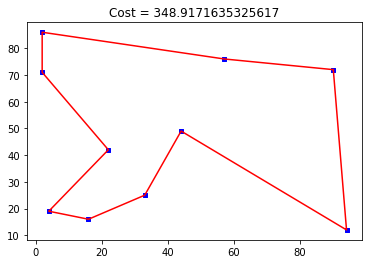

[1, 4, 10, 2, 8, 5, 6, 3, 9, 7] 348.9171635325617


In [1]:
###Example of a Genetic Algirthm for TSP - RECOMMEND YOU ONLY CHANGE THE PARTS NEAR END (HIGHLIGHTED)

import sys, math, random, heapq
import matplotlib.pyplot as plt
from itertools import chain

if sys.version_info < (3, 0):
   sys.exit("""Sorry, requires Python 3.x, not Python 2.x.""")

class Graph:

    def __init__(self, vertices):
        self.vertices = vertices
        self.n = len(vertices)

    def x(self, v):
        return self.vertices[v][0]

    def y(self, v):
        return self.vertices[v][1]

    # Lookup table for distances
    _d_lookup = {}

    def d(self, u, v):
        """Euclidean Metric d_2((x1, y1), (x2, y2))"""

        # Check if the distance was computed before
        if (u, v) in self._d_lookup:
            return self._d_lookup[(u, v)]

        # Otherwise compute it
        _distance = math.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2)

        # Add to dictionary
        self._d_lookup[(u, v)], self._d_lookup[(v, u)] = _distance, _distance
        return _distance

    def plot(self, tour=None):
        """Plots the cities and superimposes given tour"""
        if tour is None:
            tour = Tour(self, [])

        _vertices = [self.vertices[0]]

        for i in tour.vertices:
            _vertices.append(self.vertices[i])

        _vertices.append(self.vertices[0])

        plt.title("Cost = " + str(tour.cost()))
        plt.plot(*zip(*_vertices), '-r')
        plt.scatter(*zip(*self.vertices), c="b", s=10, marker="s")
        plt.show()


##### Calculates the distance of a given (full) path
class Tour:

    def __init__(self, g, vertices = None):
        """Generate random tour in given graph g"""

        self.g = g

        if vertices is None:
            self.vertices = list(range(1, g.n))
            random.shuffle(self.vertices)
        else:
            self.vertices = vertices

        self.__cost = None

    def cost(self):
        """Return total edge-cost of tour"""

        if self.__cost is None:
            self.__cost = 0
            for i, j in zip([0] + self.vertices, self.vertices + [0]):
                self.__cost += self.g.d(self.g.vertices[i], self.g.vertices[j])
        return self.__cost

##### Main GA parameters (Probability of creating each type of child)
class GeneticAlgorithm:

    def __init__(self, g, population_size, k=5, elite_mating_rate=0.5,
                 mutation_rate=0.015, mutation_swap_rate=0.2):   #Probability of each type of child being created
        """Initialises algorithm parameters"""

        self.g = g
        
        self.population = []
        for _ in range(population_size):
            self.population.append(Tour(g))

        self.population_size = population_size
        self.k = k
        self.elite_mating_rate = elite_mating_rate
        self.mutation_rate = mutation_rate
        self.mutation_swap_rate = mutation_swap_rate

##### Crossover - as described in Teaching Material (Week 10 = AI)
    def crossover(self, mum, dad):
        """Implements ordered crossover"""

        size = len(mum.vertices)

        # Choose random start/end position for crossover
        alice, bob = [-1] * size, [-1] * size
        start, end = sorted([random.randrange(size) for _ in range(2)])

        # Replicate mum's sequence for alice, dad's sequence for bob
        for i in range(start, end + 1):
            alice[i] = mum.vertices[i]
            bob[i] = dad.vertices[i]

        # Fill the remaining position with the other parents' entries
        current_dad_position, current_mum_position = 0, 0

        for i in chain(range(start), range(end + 1, size)):

            while dad.vertices[current_dad_position] in alice:
                current_dad_position += 1

            while mum.vertices[current_mum_position] in bob:
                current_mum_position += 1

            alice[i] = dad.vertices[current_dad_position]
            bob[i] = mum.vertices[current_mum_position]

        # Return twins
        return Tour(self.g, alice), Tour(self.g, bob)

##### Mutation - as done in TSP_HillClimb.py and described in Teaching Material (Week 9)
    def mutate(self, tour):
        """Randomly swaps pairs of cities in a given tour according to mutation rate"""

        # Decide whether to mutate
        if random.random() < self.mutation_rate:

            # For each vertex
            for i in range(len(tour.vertices)):

                # Randomly decide whether to swap
                if random.random() < self.mutation_swap_rate:

                    # Randomly choose other city position
                    j = random.randrange(len(tour.vertices))

                    # Swap
                    tour.vertices[i], tour.vertices[j] = tour.vertices[j], tour.vertices[i]

##### Selects the fittest parents
    def select_parent(self, k):
        """Implements k-tournament selection to choose parents"""
        tournament = random.sample(self.population, k)
        return max(tournament, key=lambda t: t.cost())

##### Checks fitness of parents/child and creates new population
    def evolve(self):
        """Executes one iteration of the genetic algorithm to obtain a new generation"""

        new_population = []

        for _ in range(self.population_size):

            # K-tournament for parents
            mum, dad = self.select_parent(self.k), self.select_parent(self.k)
            alice, bob = self.crossover(mum, dad)

            # Mate in an elite fashion according to the elitism_rate
            if random.random() < self.elite_mating_rate:
                if alice.cost() < mum.cost() or alice.cost() < dad.cost():
                    new_population.append(alice)
                if bob.cost() < mum.cost() or bob.cost() < dad.cost():
                    new_population.append(bob)

            else:
                self.mutate(alice)
                self.mutate(bob)
                new_population += [alice, bob]

        # Add new population to old
        self.population += new_population

        # Retain fittest
        self.population = heapq.nsmallest(self.population_size, self.population, key=lambda t: t.cost())

###########################################################################
##### IMPORTANT ##### number of generations

    def run(self, iterations=400):  #Number of Generations: more = better, but takes longer
        for _ in range(iterations):
            self.evolve()

    def best(self):
        return max(self.population, key=lambda t: t.cost())

###########################################################################
##### IMPORTANT ##### The data for the Question

#Practical 9, Question 5
g = Graph([(90,72),#1
(33,25),#2
(2,71),#3
(94,12),#4
(4,19),#5
(22,42),#6
(57,76),#7
(16,16),#8
(2,86),#9
(44,49),#10
])
# (19.9906676704456,79.6926263050003),#W1
# (2.76790974222021,71.1176072605653),#5
# (10.8797000941924,72.5752467820306),#12
# (14.031734193723,65.4926922540545),#4
# (18.6794883893845,67.2743901634899),#6
# (19.9906676704456,79.6926263050003),#W1
###########################################################################
##### IMPORTANT ##### population size

ga = GeneticAlgorithm(g, 300)    #Inputs (graph co-ordinates, POPULATION SIZE)  more = better, but takes longer
ga.run()


########## Output
best_tour = ga.best()
g.plot(best_tour)   #Plots the path on a graph

best_path = best_tour.vertices
size = len (g.vertices)
for i in range(size-1):
    best_path[i]=best_path[i]+1   #Must +1 to nodes to chnage numbering from (0,n-1) to (1,n)
best_path.insert(0,1)   #Adds start node to the list
print(best_path,best_tour._Tour__cost)   #Prints the best path and distance
